# Paper Graphics

In [1]:
# version
import datetime
print(datetime.date.today())

2018-06-13


In [2]:
%matplotlib notebook

In [3]:
run plots.py

In [4]:
prec = 500

In [5]:
# prepath where to save the figures
savepath = "./figs/"
# savepath = "./"

## Policy Classification: opt, sus, safe

In [6]:
δ = 1.0
ρ = 0.2
γ = 1.0
rh = 1.0
rl = 0.5
#rmin = 0.2
rmin = 0.3
#rl = 0.4
#rmin = 0.3

xaxis = "δ"
yaxis = "γ"

<IPython.core.display.Javascript object>


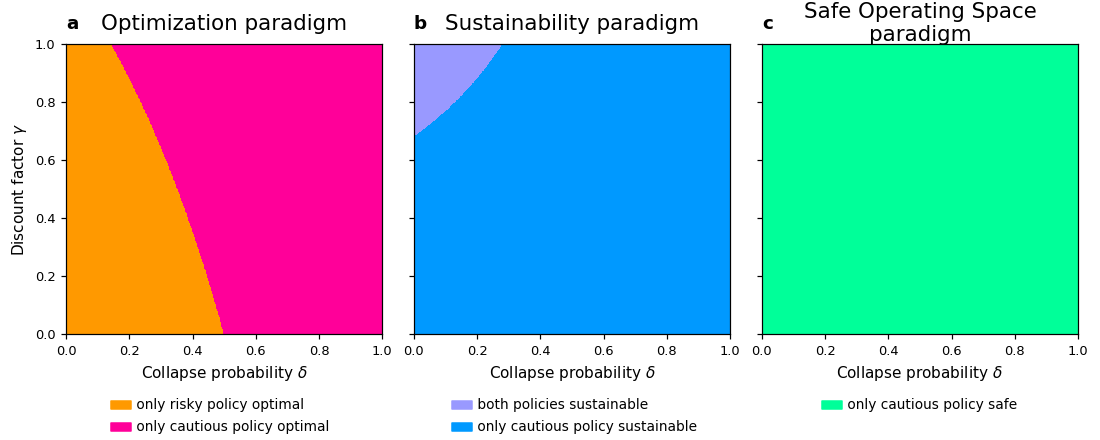

In [7]:
fig, ax = plt.subplots(1, 3, sharey='row', sharex="col", figsize=(10, 4) )
bott=0.24
topp=0.9
leftt=0.06
rightt=0.98
smallfontsize = 8.5

# colors
ov = 0.6
risky_opt_color = (1.0, ov, 0)
cautious_opt_color = (1.0, 0, ov)
both_sus_color = (ov, ov, 1.0)
cautious_sus_color = (0.0, ov, 1.0)
cautious_safe_color = (0.0, 1.0, ov)

plot_optimal_policies(δ, ρ, γ, rh, rl, xaxis=xaxis, yaxis=yaxis, prec=prec,
                      riskyoptcolor=risky_opt_color,
                      cautiousoptcolor=cautious_opt_color,
                      ax=ax[0])
plot_sustainble_policies(δ, ρ, γ, rh, rl, rmin, xaxis=xaxis, yaxis=yaxis, prec=prec,
                         bothsuscolor=both_sus_color,
                         cautioussuscolor=cautious_sus_color,
                         ax=ax[1])
plot_SOS_policies(δ, ρ, γ, rh, rl, xaxis=xaxis, yaxis=yaxis, prec=prec,
                  cautiousafecolor=cautious_safe_color,
                  ax=ax[2])

# clear labels
for a in ax:
    a.set_ylabel("")
    a.set_xlabel("")

    
# titles
yight = 1.07
fsize = 14
ax[0].annotate("Optimization paradigm", (0.5, yight), xycoords="axes fraction",
                  ha="center", va="center", fontsize=fsize)
ax[1].annotate("Sustainability paradigm", (0.5, yight), xycoords="axes fraction",
                  ha="center", va="center", fontsize=fsize)
ax[2].annotate("Safe Operating Space\nparadigm", (0.5, yight), xycoords="axes fraction",
                  ha="center", va="center", fontsize=fsize)

# numbers
ax[0].annotate("a", (0.0, yight), xycoords="axes fraction", weight='demibold',
                  ha="left", va="center", fontsize=12)
ax[1].annotate("b", (0.0, yight), xycoords="axes fraction", weight='demibold',
                  ha="left", va="center", fontsize=12)
ax[2].annotate("c", (0.0, yight), xycoords="axes fraction", weight='demibold',
                  ha="left", va="center", fontsize=12)

# add labels
xlab = r"Collapse probability $\delta$"
ylab = r"Discount factor $\gamma$"
labelfsize = 10
for axis in ax:
    axis.set_xlabel(xlab)
    axis.tick_params(axis='both', which='major', labelsize=smallfontsize)
    axis.xaxis.label.set_fontsize(labelfsize)
for axis in [ax[0]]:
    axis.set_ylabel(ylab)
    axis.tick_params(axis='both', which='major', labelsize=smallfontsize)
    axis.yaxis.label.set_fontsize(labelfsize)



# Legend
plt.subplots_adjust(bottom=bott, top=topp, left=leftt, right=rightt)
lfontsize = 9
dy = 0.05
legendtopbottom = 0.07
# - left column
left = 0.1
ro = fig.add_axes((left, legendtopbottom, 0.02,0.02), frameon=False, xticks=[], yticks=[])
ro.fill_between(np.linspace(0,1,prec), 0, 1, color=risky_opt_color)
ro.annotate(" only risky policy optimal", (1.0, 0.5), xycoords="axes fraction", ha="left", va="center",
            fontsize=lfontsize)  
so= fig.add_axes((left, legendtopbottom-dy, 0.02, 0.02), frameon=False, xticks=[], yticks=[])
so.fill_between(np.linspace(0,1,prec), 0, 1, color=cautious_opt_color)
so.annotate(" only cautious policy optimal", (1.0, 0.5), xycoords="axes fraction", ha="left", va="center",
            fontsize=lfontsize)

# - mid column
left = 0.41
bs = fig.add_axes((left, legendtopbottom, 0.02,0.02), frameon=False, xticks=[], yticks=[])
bs.fill_between(np.linspace(0,1,prec), 0, 1, color=both_sus_color)
bs.annotate(" both policies sustainable", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)
ss = fig.add_axes((left, legendtopbottom-dy, 0.02,0.02), frameon=False, xticks=[], yticks=[])
ss.fill_between(np.linspace(0,1,prec), 0, 1, color=cautious_sus_color)
ss.annotate(" only cautious policy sustainable", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)



# - right column
left = 0.746
bsos = fig.add_axes((left, legendtopbottom, 0.02,0.02), frameon=False, xticks=[], yticks=[])
bsos.fill_between(np.linspace(0,1,prec), 0, 1, color=cautious_safe_color)
bsos.annotate(" only cautious policy safe", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)


# space
plt.subplots_adjust(wspace=0.1)
plt.savefig(savepath + "Results_Policies.png", dpi=300)


## Policy Combinations

<IPython.core.display.Javascript object>


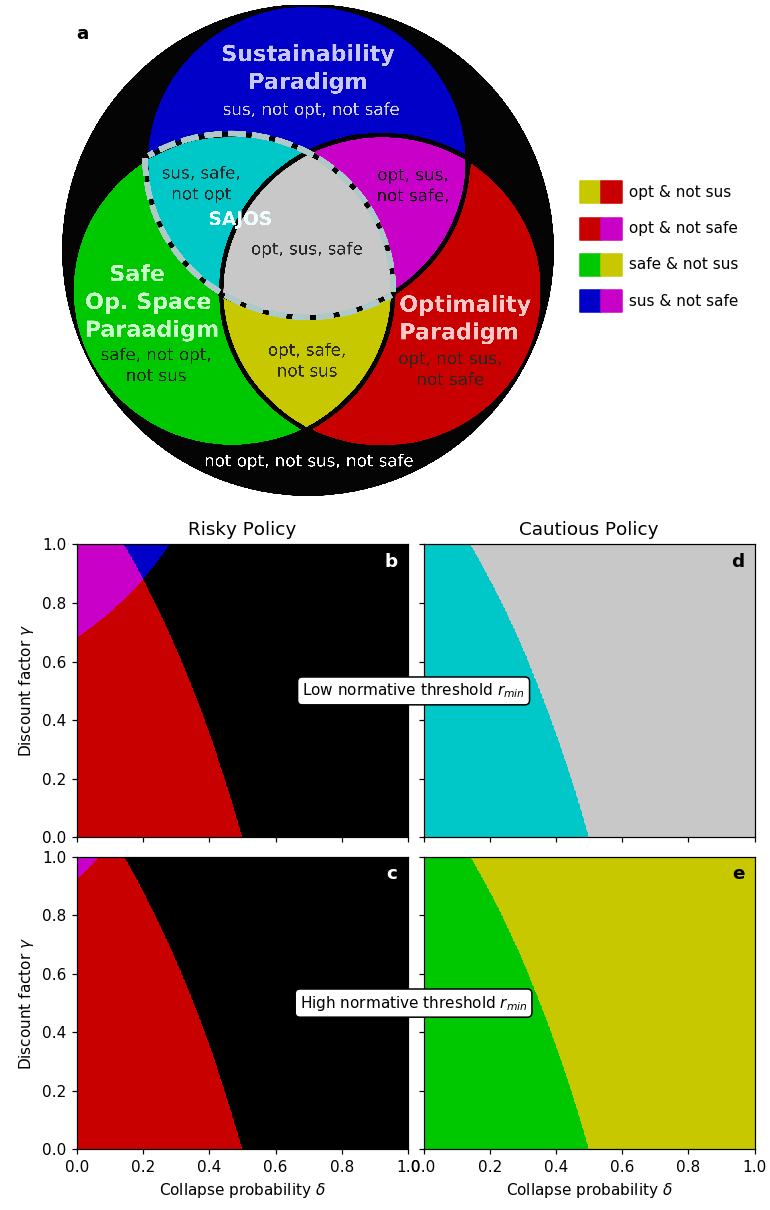

In [8]:
fig = plt.figure(figsize=(7, 11))

# ========================
#    AXES
# ========================
leftax = 0.1
rightax = 0.98
bottax = 0.05
highax = 0.55
dx=0.01
dy=0.008

ax11 = plt.axes([leftax,
                 bottax,
                 0.5*(rightax-leftax)-dx,
                 0.5*(highax-bottax)-dy])
ax21 = plt.axes([leftax,
                 dy+bottax+0.5*(highax-bottax),
                 0.5*(rightax-leftax)-dx,
                 0.5*(highax-bottax)-dy])
ax12 = plt.axes([dx+leftax+0.5*(rightax-leftax),
                 bottax,
                 0.5*(rightax-leftax)-dx,
                 0.5*(highax-bottax)-dy])
ax22 = plt.axes([dx+leftax+0.5*(rightax-leftax),
                 dy+bottax+0.5*(highax-bottax),
                 0.5*(rightax-leftax)-dx,
                 0.5*(highax-bottax)-dy])


#ax3 = plt.axes([-d3 , -0.03+bottax+0.2*highax,
#                0.04+leftax, 0.03+0.6*(highax-bottax)])


# ==========================
#    Plottings
# ==========================
# ρ = 0.2
rmin = 0.3

_plot_PolicyCombinations(δ, ρ, γ, rh, rl, rmin, xaxis=xaxis, yaxis=yaxis, prec=prec,
                         policy="risky", ax=ax21)
ax21.set_title("Risky Policy")
ax21.set_ylabel(r"Discount factor $\gamma$")
ax21.set_xlabel("")
ax21.set_xticklabels([])

_plot_PolicyCombinations(δ, ρ, γ, rh, rl, rmin, xaxis=xaxis, yaxis=yaxis, prec=prec,
                         policy="safe", ax=ax22)
ax22.set_title("Cautious Policy")
ax22.set_ylabel(r"")
ax22.set_xlabel(r"")
ax22.set_yticklabels([])
ax22.set_xticklabels([])

rmin = 0.7 # ======================================

_plot_PolicyCombinations(δ, ρ, γ, rh, rl, rmin, xaxis=xaxis, yaxis=yaxis, prec=prec,
                         policy="risky", ax=ax11)
ax11.set_xlabel(r"Collapse probability $\delta$")
ax11.set_ylabel(r"Discount factor $\gamma$")

_plot_PolicyCombinations(δ, ρ, γ, rh, rl, rmin, xaxis=xaxis, yaxis=yaxis, prec=prec,
                         policy="safe", ax=ax12)
ax12.set_xlabel(r"Collapse probability $\delta$")
ax12.set_yticklabels([])


# Threshold labels
ax12.annotate(r"High normative threshold $r_{min}$", (-0.03, 0.5), xycoords="axes fraction",
              ha="center", va="center",
              rotation=0, bbox=dict(boxstyle="round", fc=(1.,1.,1.), ec=(0., .0, .0)))

ax22.annotate(r"Low normative threshold $r_{min}$", (-.03, 0.5), xycoords="axes fraction",
              ha="center", va="center",
              rotation=0, bbox=dict(boxstyle="round", fc=(1.,1.,1.), ec=(0., .0, .0)))


d3=0.04
ax3 = plt.axes([0, highax+d3, 0.8, 1-highax-1.1*d3 ])
image = plt.imread("figs/Paradigms_Legend.png")
ax3.imshow(image)
ax3.set_yticks([])
ax3.axis('off')  # clear x- and y-axes


# Trefoil Legend
left = 0.75
dy = 0.03
legendtopbottom = highax+d3+(1-highax-d3)/2 + 1.2*dy #0.02+highax+d3+3*dy
lfontsize = 10
cv = 200/255.

l1 = fig.add_axes((left, legendtopbottom, 0.06,0.02), frameon=False, xticks=[], yticks=[])
l1.fill_between(np.linspace(0,0.5,prec), 0, 1, color=(cv, cv, 0.))
l1.fill_between(np.linspace(0.5,1,prec), 0, 1, color=(cv, 0, 0))
l1.annotate(" opt & not sus", (1.0, 0.5),
            xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)

l2 = fig.add_axes((left, legendtopbottom-dy, 0.06,0.02), frameon=False, xticks=[], yticks=[])
l2.fill_between(np.linspace(0,0.5,prec), 0, 1, color=(cv, 0, 0.))
l2.fill_between(np.linspace(0.5,1,prec), 0, 1, color=(cv, 0, cv))
l2.annotate(" opt & not safe", (1.0, 0.5),
            xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)

l3 = fig.add_axes((left, legendtopbottom-2*dy, 0.06,0.02), frameon=False, xticks=[], yticks=[])
l3.fill_between(np.linspace(0,0.5,prec), 0, 1, color=(0, cv, 0.))
l3.fill_between(np.linspace(0.5,1,prec), 0, 1, color=(cv, cv, 0))
l3.annotate(" safe & not sus", (1.0, 0.5),
            xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)

l4 = fig.add_axes((left, legendtopbottom-3*dy, 0.06,0.02), frameon=False, xticks=[], yticks=[])
l4.fill_between(np.linspace(0,0.5,prec), 0, 1, color=(0, 0, cv))
l4.fill_between(np.linspace(0.5,1,prec), 0, 1, color=(cv, 0, cv))
l4.annotate(" sus & not safe", (1.0, 0.5),
            xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)





# number labels
ax3.annotate("a", (0.04, 0.94), xycoords="axes fraction", ha="center", va="center", 
              weight='demibold', fontsize=12)
ax21.annotate("b", (0.95, 0.94), xycoords="axes fraction", ha="center", va="center", 
              weight='demibold', fontsize=12, color="white")
ax11.annotate("c", (0.95, 0.94), xycoords="axes fraction", ha="center", va="center", 
              weight='demibold', fontsize=12, color="white")
ax22.annotate("d", (0.95, 0.94), xycoords="axes fraction", ha="center", va="center", 
              weight='demibold', fontsize=12, color="black")
ax12.annotate("e", (0.95, 0.94), xycoords="axes fraction", ha="center", va="center", 
              weight='demibold', fontsize=12, color="black")


plt.savefig(savepath + "Results_PolicyTrefoil.png", dpi=300)

## Real world examples

<IPython.core.display.Javascript object>


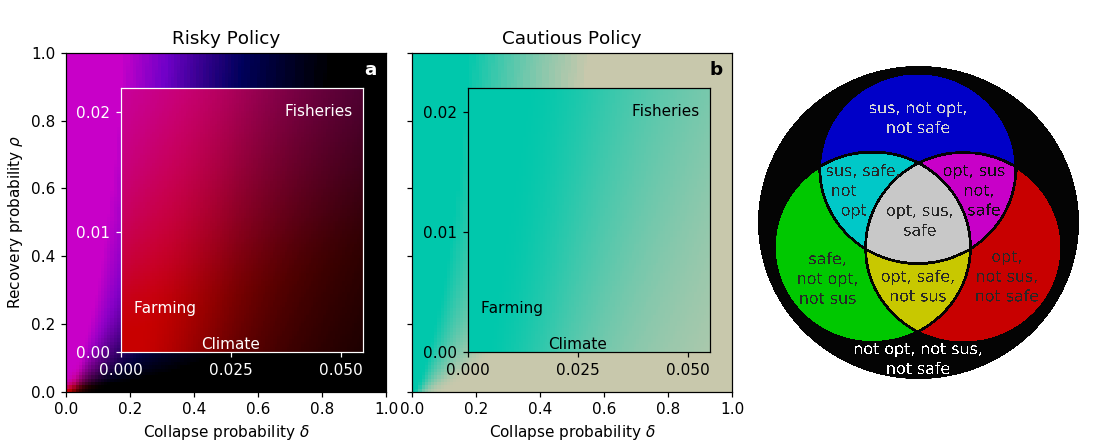

(2, 3, 4, 5)
swapping axes
(2, 3, 4, 5)
swapping axes
(2, 3, 4, 5)
swapping axes
(2, 3, 4, 5)
swapping axes


In [9]:
# revision update

fig, ax = plt.subplots(1, 3, figsize=(10, 4) )

δ = (0.0, 1.0)
ρ = (0.0, 1.0)
γ = (0.95, 0.99)
rh = (1.0, 1.0)
#rl = 0.4
#rmin = 0.3
rl = (0.3, 0.7)
#rl = (0.25, 0.75)

# rmin = (0.3, 0.5)
rmin = (0.1, 0.5)

xaxis = "δ"
yaxis = "ρ"

prec = 101
uprec = 21


plot_PolicyCombinations_withUncertainty(δ, ρ, γ, rh, rl, rmin, 
                                        xaxis=xaxis, yaxis=yaxis,
                                        plotprec=prec, uprec=uprec,
                                        policy="risky", ax=ax[0])
ax[0].set_title("Risky Policy")
ax[0].set_xlabel(r"Collapse probability $\delta$")
ax[0].set_ylabel(r"Recovery probability $\rho$")

plot_PolicyCombinations_withUncertainty(δ, ρ, γ, rh, rl, rmin, 
                                        xaxis=xaxis, yaxis=yaxis,
                                        plotprec=prec, uprec=uprec,
                                        policy="cautious", ax=ax[1])
ax[1].set_title("Cautious Policy")
ax[1].set_yticklabels([])
ax[1].set_ylabel("")
ax[1].set_xlabel(r"Collapse probability $\delta$")


image = plt.imread("figs/Paradigms_Legend_Sparse.png")
ax[2].imshow(image)
ax[2].set_yticks([])
ax[2].axis('off')  # clear x- and y-axes



ax0 = plt.axes([0.11, 0.2, 0.22, 0.6])
ax1 = plt.axes([0.425, 0.2, 0.22, 0.6])


δ2 = (0.0, 0.055)
ρ2 = (0.0, 0.022)
plot_PolicyCombinations_withUncertainty(δ2, ρ2, γ, rh, rl, rmin, 
                                        xaxis=xaxis, yaxis=yaxis,
                                        plotprec=prec, uprec=uprec,
                                        policy="risky", ax=ax0)
plot_PolicyCombinations_withUncertainty(δ2, ρ2, γ, rh, rl, rmin, 
                                        xaxis=xaxis, yaxis=yaxis,
                                        plotprec=prec, uprec=uprec,
                                        policy="cautious", ax=ax1)

ax0.spines['bottom'].set_color('white')
ax0.spines['top'].set_color('white')
ax0.spines['left'].set_color('white')
ax0.spines['right'].set_color('white')
for t in ax0.xaxis.get_ticklines(): t.set_color('white')
for t in ax0.yaxis.get_ticklines(): t.set_color('white')
for t in ax0.xaxis.get_ticklabels(): t.set_color("white")
for t in ax0.yaxis.get_ticklabels(): t.set_color("white")

    
ax1.set_xticks([0.0, 0.025, 0.05])
ax0.set_xticks([0.0, 0.025, 0.05])
ax0.set_yticks([0.0, 0.01, 0.02])
ax1.set_yticks([0.0, 0.01, 0.02])

ax1.set_xlabel("")
ax0.set_xlabel("")
ax1.set_ylabel("")
ax0.set_ylabel("")


props = lambda years: 1/(years+1)
#ax0.plot([props(30), props(50)], [0, 0], lw=4, color="yellow")

ax0.annotate("Climate", (0.025, 0.0), xycoords="data", color="w", ha="center", va="bottom")
ax1.annotate("Climate", (0.025, 0.0), xycoords="data", color="k", ha="center", va="bottom")

ax0.annotate("Fisheries", (0.045, 0.02), xycoords="data", color="w", ha="center", va="center")
ax1.annotate("Fisheries", (0.045, 0.02), xycoords="data", color="k", ha="center", va="center")

ax0.annotate("Farming", (0.01, 0.003), xycoords="data", color="w", ha="center", va="bottom")
ax1.annotate("Farming", (0.01, 0.003), xycoords="data", color="k", ha="center", va="bottom")

ax[0].annotate("a", (0.95, 0.95), xycoords="axes fraction", ha="center", va="center", 
               weight='demibold', fontsize=12, color="white")
ax[1].annotate("b", (0.95, 0.95), xycoords="axes fraction", ha="center", va="center", 
               weight='demibold', fontsize=12, color="k")

plt.subplots_adjust(wspace=0.08, left=0.06, right=0.98)

plt.savefig(savepath + "Policies_RealWorld.png", dpi=300)

## Volumes

In [10]:
%run plots.py

<IPython.core.display.Javascript object>


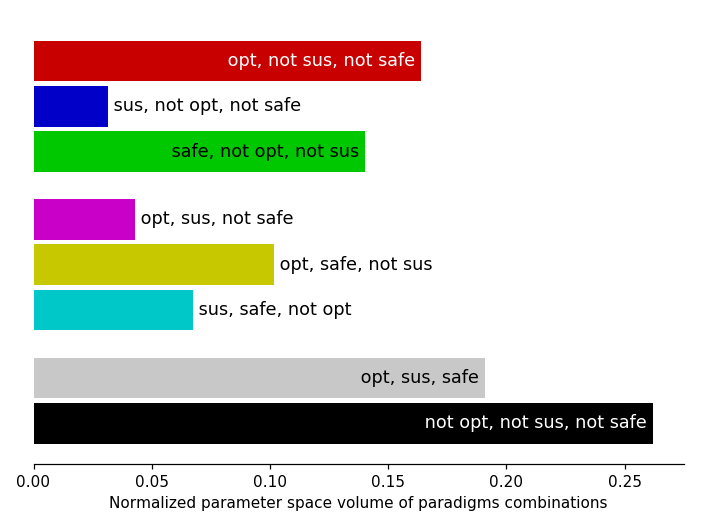

In [11]:
plot_ParadigmVolumes()
plt.tight_layout()
plt.savefig(savepath + "VolumesOfParadigmCombinations.png", dpi=300)

## Methods Fig: Acceptable States + Sustainable Policies

In [12]:
%run plots.py

In [13]:
δ = 1.0
ρ = 0.2
γ = 1.0
rh = 1.0
rl = 0.5
rmin = 0.3
xaxis = "δ"
yaxis = "γ"

In [14]:
prec = 501

<IPython.core.display.Javascript object>


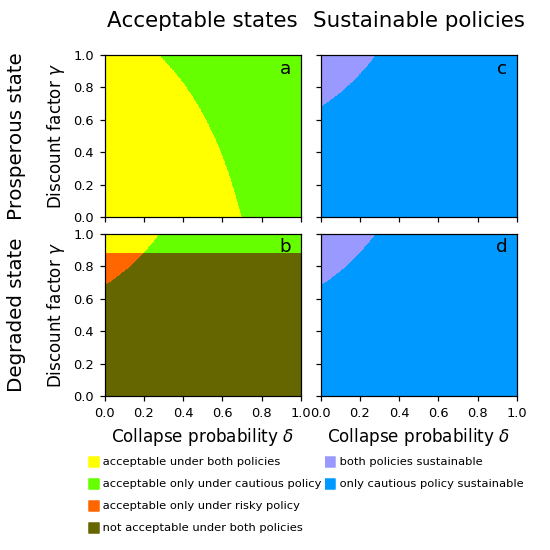

In [15]:
fig, ax = plt.subplots(2, 2, sharey='row', sharex="col", figsize=(5, 5) )
bott=0.28
topp=0.9
leftt=0.19
rightt=0.94
smallfontsize = 8.5

# colors
ov = 0.6
tol_underboth_color = (1.0, 1.0, 0.0)
tol_undercautious_color = (1.0-ov, 1.0, 0.0)
tol_underrisky_color = (1.0, 1.0-ov, 0.0)
tol_underno_color = (1.0-ov, 1.0-ov, 0.0)

both_sus_color = (ov, ov, 1.0)
cautious_sus_color = (0.0, ov, 1.0)

# the actual plot

plot_acceptal_states(δ, ρ, γ, rh, rl, rmin,
                     bothacceptcolor=tol_underboth_color,
                     cautiousacceptcolor=tol_undercautious_color,
                     riskyacceptcolor=tol_underrisky_color,
                     nonacceptcolor=tol_underno_color,
                     state="degraded",
                     xaxis="δ", yaxis="γ", prec=prec, ax=ax[1,0])

plot_acceptal_states(δ, ρ, γ, rh, rl, rmin,
                     bothacceptcolor=tol_underboth_color,
                     cautiousacceptcolor=tol_undercautious_color,
                     riskyacceptcolor=tol_underrisky_color,
                     nonacceptcolor=tol_underno_color,
                     state="prosperous",
                     xaxis="δ", yaxis="γ", prec=prec, ax=ax[0,0])

plot_sustainble_policies(δ, ρ, γ, rh, rl, rmin, xaxis=xaxis, yaxis=yaxis,
                         prec=prec,
                         bothsuscolor=both_sus_color,
                         cautioussuscolor=cautious_sus_color,
                         ax=ax[1,1])


plot_sustainble_policies(δ, ρ, γ, rh, rl, rmin, xaxis=xaxis, yaxis=yaxis,
                         prec=prec,
                         bothsuscolor=both_sus_color,
                         cautioussuscolor=cautious_sus_color,
                         ax=ax[0,1])

#plot_acceptable_region_to_ax(a, b, g, hhh, hlh, rmin=r_min, axes=ax.T[0])
#plot_suspol_to_ax(a, b, g, hhh, hlh, rmin=r_min, axes=ax.T[1])

# clear labels
for axes in ax:
    map(lambda ax: ax.set_ylabel(""), axes)
    map(lambda ax: ax.set_xlabel(""), axes)

    
# titles
yight = 1.15
fsize = 14
ax[0, 0].annotate("Acceptable states", (0.5, yight), xycoords="axes fraction",
                  ha="center", va="bottom", fontsize=fsize)
ax[0, 1].annotate("Sustainable policies", (0.5, yight), xycoords="axes fraction",
                  ha="center", va="bottom", fontsize=fsize)


fig.subplots_adjust(left=0.2)
ax[0, 0].annotate("Prosperous state", (-0.4, 0.5), xycoords="axes fraction", ha="right", va="center",
                rotation=90, fontsize=13)
ax[1, 0].annotate("Degraded state", (-0.4, 0.5), xycoords="axes fraction", ha="right", va="center",
                rotation=90, fontsize=13)

# numbers
ax[0, 0].annotate("a", (0.95, 0.97), xycoords="axes fraction", ha="right", va="top", fontsize=12)
ax[1, 0].annotate("b", (0.95, 0.97), xycoords="axes fraction", ha="right", va="top", fontsize=12)
ax[0, 1].annotate("c", (0.95, 0.97), xycoords="axes fraction", ha="right", va="top", fontsize=12)
ax[1, 1].annotate("d", (0.95, 0.97), xycoords="axes fraction", ha="right", va="top", fontsize=12)

# add labels
xlab = r"Collapse probability $\delta$"
ylab = r"Discount factor $\gamma$"
labelfsize = 11
for axis in ax[1]:
    axis.set_xlabel(xlab)
    axis.tick_params(axis='both', which='major', labelsize=smallfontsize)
    axis.xaxis.label.set_fontsize(labelfsize)
for axis in ax.T[0]:
    axis.set_ylabel(ylab)
    axis.tick_params(axis='both', which='major', labelsize=smallfontsize)
    axis.yaxis.label.set_fontsize(labelfsize)
ax[0, 1].set_ylabel("")
ax[1, 1].set_ylabel("")
ax[0, 0].set_xlabel("")
ax[0, 1].set_xlabel("")

# Legend
plt.subplots_adjust(bottom=bott, top=topp, left=leftt, right=rightt)
lfontsize = 7.5
dy = 0.04
legendtopbottom = 0.15
# - left column
left = 0.16
tuboth = fig.add_axes((left, legendtopbottom, 0.02,0.02), frameon=False, xticks=[], yticks=[])
tuboth.fill_between(np.linspace(0,1,prec), 0, 1, color=tol_underboth_color)
tuboth.annotate(" acceptable under both policies", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)  
tusafe = fig.add_axes((left, legendtopbottom-dy, 0.02,0.02), frameon=False, xticks=[], yticks=[])
tusafe.fill_between(np.linspace(0,1,prec), 0, 1, color=tol_undercautious_color)
tusafe.annotate(" acceptable only under cautious policy", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)  
turisky = fig.add_axes((left, legendtopbottom-2*dy, 0.02,0.02), frameon=False, xticks=[], yticks=[])
turisky.fill_between(np.linspace(0,1,prec), 0, 1, color=tol_underrisky_color)
turisky.annotate(" acceptable only under risky policy", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)      
tuno = fig.add_axes((left, legendtopbottom-3*dy, 0.02,0.02), frameon=False, xticks=[], yticks=[])
tuno.fill_between(np.linspace(0,1,prec), 0, 1, color=tol_underno_color)
tuno.annotate(" not acceptable under both policies", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)

# - right column
left = 0.59
bs = fig.add_axes((left, legendtopbottom, 0.02,0.02), frameon=False, xticks=[], yticks=[])
bs.fill_between(np.linspace(0,1,prec), 0, 1, color=both_sus_color)
bs.annotate(" both policies sustainable", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)
ss = fig.add_axes((left, legendtopbottom-dy, 0.02,0.02), frameon=False, xticks=[], yticks=[])
ss.fill_between(np.linspace(0,1,prec), 0, 1, color=cautious_sus_color)
ss.annotate(" only cautious policy sustainable", (1.0, 0.5),
                xycoords="axes fraction", ha="left", va="center", fontsize=lfontsize)

# space
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(savepath + "Results_AcceptSus.png")